In [100]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [101]:
file_path = r"data/CleanedMusic.csv"

df = pd.read_csv(file_path)

In [102]:
df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


---


# K Means Clustering Without Scaling

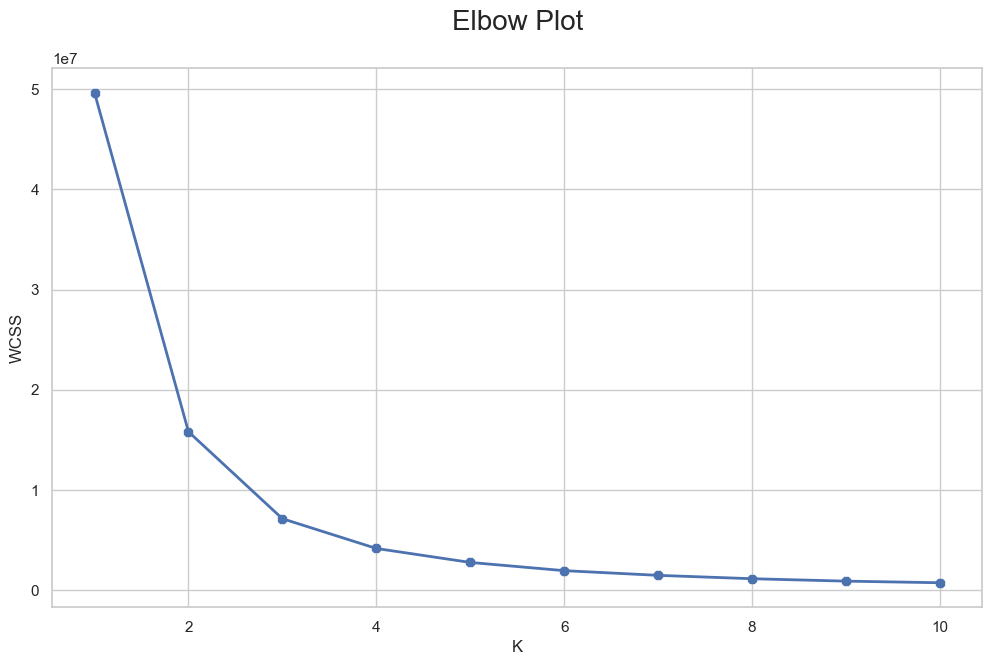

In [104]:
# Create an Elbow plot of WSS (Within-Cluster Sum of Squares)

X1 = df.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age', 'len']].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init="k-means++" , random_state= 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize= (12,7))

sns.set(style="whitegrid")
plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

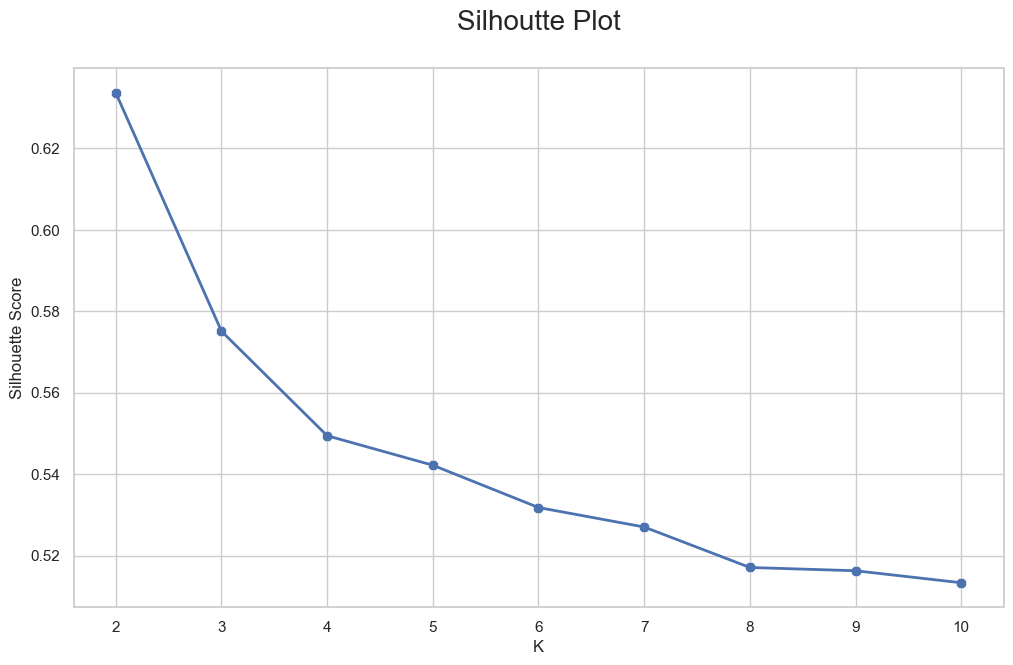

In [105]:
# Now lets create a plot of silhoutte score 


silhouette = []
for k in range(2, 11):
# create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state= 42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

# We will go with K = 4


In [106]:

kmeans =  KMeans(n_clusters= 4, init = "k-means++" , n_init=20 , random_state= 42)

kmeans.fit(X1)

# Initializes a KMeans model with 4 clusters using k-means++ initialization and a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, random_state=42)


In [107]:
# Generate labels for the dataset 

labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [108]:
#output the centroids of your clusters 

kmeans.cluster_centers_

array([[2.04270215e-02, 1.47056391e-01, 1.04572781e-01, 5.56767163e-02,
        2.15281611e-02, 1.81005471e-02, 3.10296776e-02, 7.16415553e-02,
        1.24452357e-01, 5.29636816e-02, 5.93765343e-02, 4.63353649e-02,
        2.53211300e-02, 1.04296113e-01, 3.11464827e-02, 3.44542016e-01,
        1.05784855e+02],
       [2.15363385e-02, 9.54333285e-02, 1.40876671e-01, 6.13075408e-02,
        1.36314603e-02, 1.63487401e-02, 7.16464788e-02, 8.23656639e-02,
        4.25134088e-02, 7.05007061e-02, 3.20482314e-02, 5.19630790e-02,
        2.39092427e-02, 1.58888631e-01, 3.29265759e-02, 5.03005918e-01,
        3.53326558e+01],
       [1.78918404e-02, 1.12138592e-01, 7.21925890e-02, 3.68788963e-02,
        2.50139369e-02, 1.63031157e-02, 1.73753154e-02, 6.31760791e-02,
        3.22147609e-01, 3.50270579e-02, 6.75758599e-02, 3.48090305e-02,
        2.29507973e-02, 4.41194345e-02, 2.46066513e-02, 3.03374734e-01,
        1.65540353e+02],
       [2.19893577e-02, 1.28642073e-01, 1.23443873e-01, 6.016

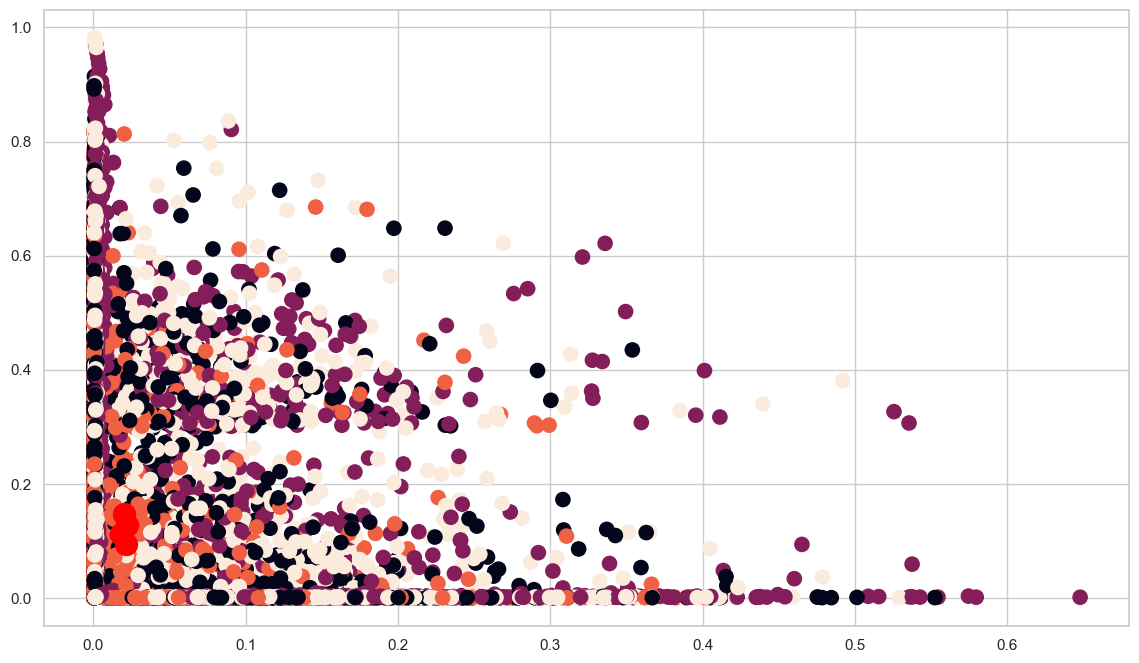

In [109]:
plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)

plt.xlabel('')
plt.ylabel('')
plt.show()

# K means clustering with Scaling 

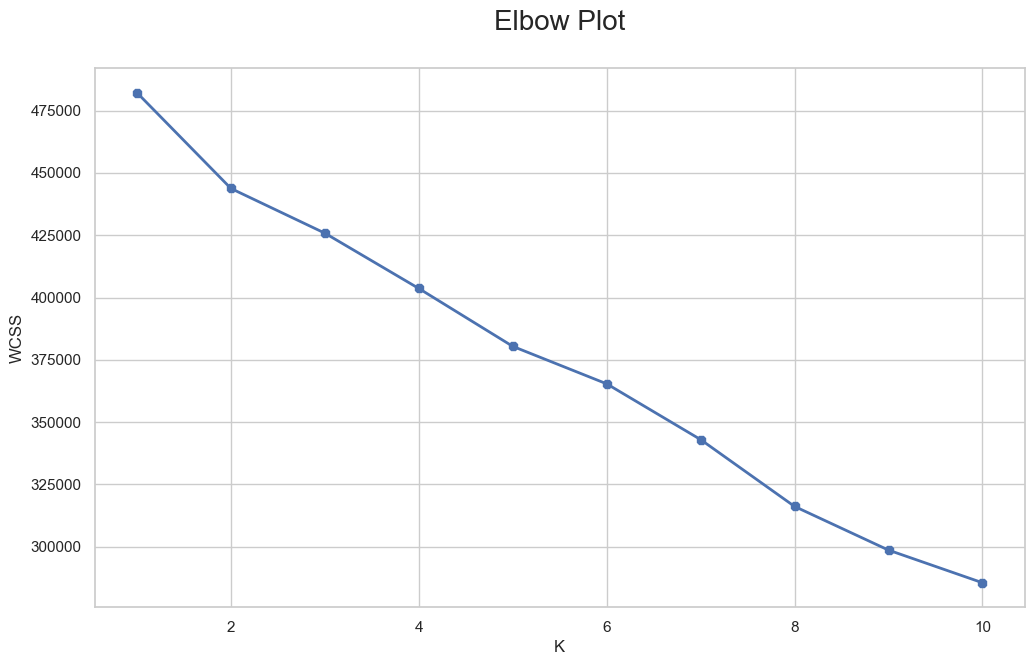

In [164]:
# Create a new KMeans object with 2 clusters. 
# Scaler used to make sure variables have equal range

scaler = StandardScaler()

#fit tgw Kmens Object
X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()




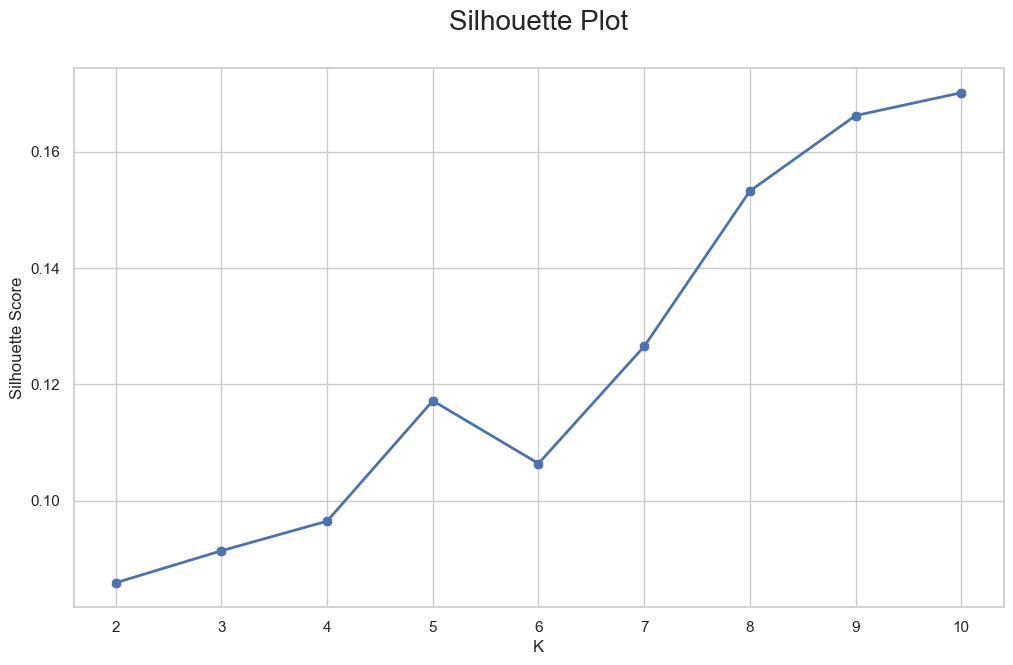

In [165]:
# create a plot of silhoutte score

sil_scaled = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state= 42)
    predictions = kmeans.fit_predict(X1_scaled)
    sil_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), sil_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


# After doing the Elbow and Silhoutte plot for Kmeans with Scaling 
# Will with go with K = 6  

In [159]:
kmeans_scaled = KMeans(n_clusters=6, init="k-means++", n_init=20, random_state =42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=6, n_init=20, random_state=42)

In [160]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([4, 5, 3, ..., 1, 1, 1], dtype=int32)

In [161]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[ 0.21000163, -0.4422942 , -0.41978581,  2.96588844,  0.02222247,
         0.00557739, -0.09735817, -0.01963492, -0.36168535, -0.25435812,
        -0.05158359, -0.08269771, -0.15598743, -0.38916589,  0.04428135,
         0.11212985, -0.2070881 ],
       [-0.00743784, -0.36739695, -0.46064162, -0.28084111,  0.22198224,
         0.02027544, -0.32573778, -0.08894109,  1.97853946, -0.30650157,
         0.23579543, -0.24089835, -0.14557289, -0.57033187, -0.12855729,
        -0.45096168,  1.01456685],
       [-0.16319002,  1.73815252, -0.3936282 , -0.240646  , -0.02787357,
        -0.02213734, -0.25173119, -0.04759346, -0.39426893, -0.30436438,
         0.04719749,  0.09248861,  0.18383823, -0.41146102, -0.11622225,
        -0.22687497,  0.04111871],
       [ 0.04282627, -0.46343253, -0.43371157, -0.23865298, -0.07883783,
         0.09764557, -0.12792456, -0.14846759, -0.39594282,  2.80158047,
         0.05656545,  0.15304603,  0.0845412 , -0.40013159, -0.10871536,
         0.42693039

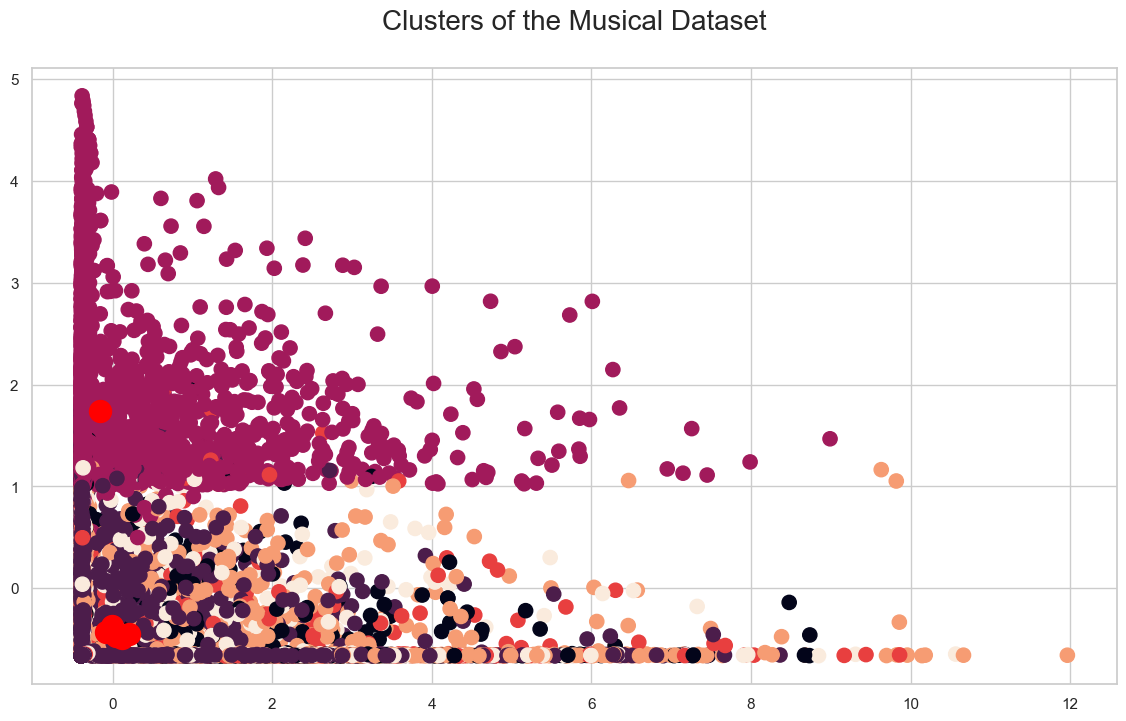

In [162]:
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of the Musical Dataset\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()


# Kmeans Clustering with Scaling Visualized with PCA

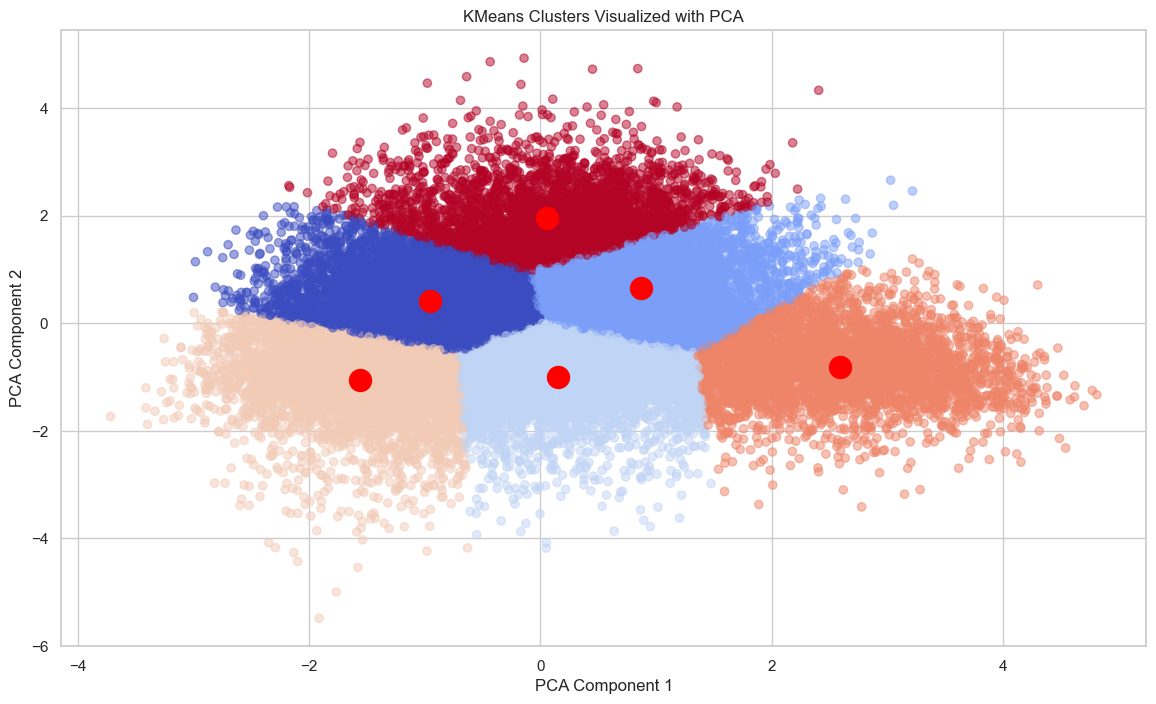

In [163]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_scaled)

kmeans_scaled = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_scaled.fit_predict(X_pca)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, cmap= "coolwarm", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
